In [1]:
%env KERAS_BACKEND=tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

In [3]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.layers import Conv2D, MaxPool2D
from keras.optimizers import SGD,Adam
from sklearn.metrics import confusion_matrix

C:\Users\SPLab1080\Anaconda3\lib\site-packages\h5py\__init__.py:72: UserWarning: h5py is running against HDF5 1.10.2 when it was built against 1.10.3, this may cause problems
  '{0}.{1}.{2}'.format(*version.hdf5_built_version_tuple)
Using TensorFlow backend.


In [4]:
(x_train0, y_train0),(x_test0, y_test0) = mnist.load_data()

# 資料前處理

In [5]:
# CNN 要的是(28,28,1)
x_train = x_train0.reshape(60000, 28, 28, 1)
x_test = x_test0.reshape(10000, 28, 28, 1)

In [6]:
y_train = np_utils.to_categorical(y_train0,10)
y_test = np_utils.to_categorical(y_test0,10)

將資料值的區間設為0~1

In [7]:
x_train1 = x_train/x_train.max()
x_test1 = x_test/x_test.max()

# MODEL1 
filter: 4,8,16 pooling layer: 2*2 full connect layer neurons: 20 optimizer: SGD loss function: mean square error

In [8]:
model1 = Sequential()
model1.add(Conv2D(4,(5,5), padding='same', input_shape=(28,28,1)))
model1.add(Activation('relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(8,(5,5), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Conv2D(16,(5,5), padding='same'))
model1.add(Activation('relu'))
model1.add(MaxPool2D(pool_size=(2,2)))

model1.add(Flatten())
model1.add(Dense(20))
model1.add(Activation('relu'))
model1.add(Dense(10))
model1.add(Activation('softmax'))

In [9]:
model1.compile(loss='mse',optimizer=SGD(lr=0.5),metrics=['acc'])

In [10]:
Model1 = model1.fit(x_train1, y_train, batch_size=64, epochs=30,verbose =1,validation_data = (x_test1,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 114us/step - loss: 0.0432 - acc: 0.6703 - val_loss: 0.0149 - val_acc: 0.9000
Epoch 2/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0090 - acc: 0.9410 - val_loss: 0.0092 - val_acc: 0.9404
Epoch 3/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0064 - acc: 0.9579 - val_loss: 0.0053 - val_acc: 0.9654
Epoch 4/30
60000/60000 [==============================] - 4s 68us/step - loss: 0.0053 - acc: 0.9658 - val_loss: 0.0051 - val_acc: 0.9674
Epoch 5/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0045 - acc: 0.9707 - val_loss: 0.0042 - val_acc: 0.9728
Epoch 6/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0041 - acc: 0.9741 - val_loss: 0.0045 - val_acc: 0.9691
Epoch 7/30
60000/60000 [==============================] - 4s 67us/step - loss: 0.0037 - acc: 0.9761 - val_loss: 0.0034 - val_ac

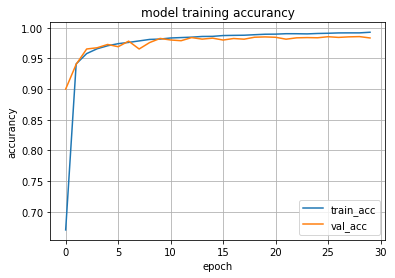

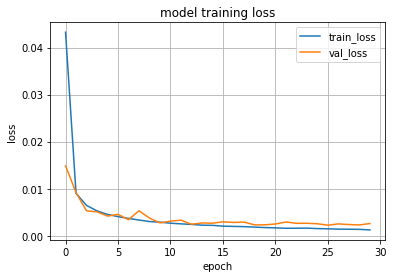

In [11]:
plt.plot(Model1.history['acc'])
plt.plot(Model1.history['val_acc'])
plt.title('model training accurancy')
plt.xlabel('epoch')
plt.ylabel('accurancy')
plt.legend(['train_acc','val_acc'],loc='best')
plt.grid()
plt.show()
plt.plot(Model1.history['loss'])
plt.plot(Model1.history['val_loss'])
plt.title('model training loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'],loc='best')
plt.grid()
plt.show()

# MODEL2 
filter: 8,16,32,64 pooling layer: 2*2 full connect layer neurons: 20 optimizer: Adam loss function: mean square error

In [12]:
model2 = Sequential()

model2.add(Conv2D(8,(5,5), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(16,(5,5), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(32,(5,5), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Conv2D(64,(5,5), padding='same'))
model2.add(Activation('relu'))
model2.add(MaxPool2D(pool_size=(2,2)))

model2.add(Flatten())
model2.add(Dense(200))
model2.add(Activation('relu'))
model2.add(Dense(10))
model2.add(Activation('softmax'))

In [13]:
model2.compile(loss='mse',optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False),metrics=['acc'])

In [14]:
Model2 = model2.fit(x_train1, y_train, batch_size=64, epochs=30,verbose =1,validation_data = (x_test1,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 93us/step - loss: 0.0117 - acc: 0.9172 - val_loss: 0.0036 - val_acc: 0.9769
Epoch 2/30
60000/60000 [==============================] - 5s 88us/step - loss: 0.0036 - acc: 0.9765 - val_loss: 0.0041 - val_acc: 0.9735
Epoch 3/30
60000/60000 [==============================] - 5s 86us/step - loss: 0.0028 - acc: 0.9821 - val_loss: 0.0027 - val_acc: 0.9824
Epoch 4/30
60000/60000 [==============================] - 5s 86us/step - loss: 0.0023 - acc: 0.9858 - val_loss: 0.0019 - val_acc: 0.9872
Epoch 5/30
60000/60000 [==============================] - 5s 88us/step - loss: 0.0020 - acc: 0.9874 - val_loss: 0.0019 - val_acc: 0.9877
Epoch 6/30
60000/60000 [==============================] - 5s 87us/step - loss: 0.0017 - acc: 0.9891 - val_loss: 0.0017 - val_acc: 0.9890
Epoch 7/30
60000/60000 [==============================] - 5s 87us/step - loss: 0.0016 - acc: 0.9899 - val_loss: 0.0019 - val_acc

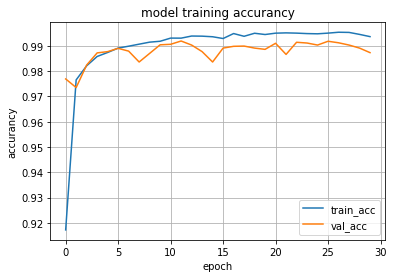

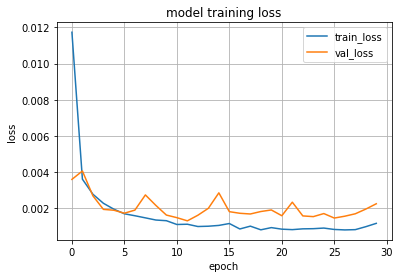

In [15]:
plt.plot(Model2.history['acc'])
plt.plot(Model2.history['val_acc'])
plt.title('model training accurancy')
plt.xlabel('epoch')
plt.ylabel('accurancy')
plt.legend(['train_acc','val_acc'],loc='best')
plt.grid()
plt.show()
plt.plot(Model2.history['loss'])
plt.plot(Model2.history['val_loss'])
plt.title('model training loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'],loc='best')
plt.grid()
plt.show()

# MODEL2 
filter: 8,16,32,64 pooling layer: 2*2 full connect layer neurons: 20 optimizer: Adam loss function: categorical_crossentropy

In [16]:
model3 = Sequential()
model3.add(Conv2D(8,(5,5), padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(16,(5,5), padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(32,(5,5), padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Conv2D(64,(5,5), padding='same'))
model3.add(Activation('relu'))
model3.add(MaxPool2D(pool_size=(2,2)))

model3.add(Flatten())
model3.add(Dense(200))
model3.add(Activation('relu'))
model3.add(Dense(10))
model3.add(Activation('softmax'))

In [17]:
model3.compile(loss="categorical_crossentropy",optimizer=Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=None,decay=0.0,amsgrad=False),metrics=['acc'])

In [18]:
Model3 = model3.fit(x_train1, y_train, batch_size=64, epochs=30,verbose =1,validation_data = (x_test1,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 6s 94us/step - loss: 0.2357 - acc: 0.9257 - val_loss: 0.0679 - val_acc: 0.9796
Epoch 2/30
60000/60000 [==============================] - 5s 88us/step - loss: 0.0683 - acc: 0.9782 - val_loss: 0.0496 - val_acc: 0.9835
Epoch 3/30
60000/60000 [==============================] - 5s 87us/step - loss: 0.0486 - acc: 0.9849 - val_loss: 0.0385 - val_acc: 0.9878
Epoch 4/30
60000/60000 [==============================] - 5s 87us/step - loss: 0.0378 - acc: 0.9878 - val_loss: 0.0449 - val_acc: 0.9845
Epoch 5/30
60000/60000 [==============================] - 5s 88us/step - loss: 0.0306 - acc: 0.9908 - val_loss: 0.0463 - val_acc: 0.9864
Epoch 6/30
60000/60000 [==============================] - 5s 88us/step - loss: 0.0270 - acc: 0.9913 - val_loss: 0.0329 - val_acc: 0.9904
Epoch 7/30
60000/60000 [==============================] - 5s 88us/step - loss: 0.0230 - acc: 0.9930 - val_loss: 0.0366 - val_acc

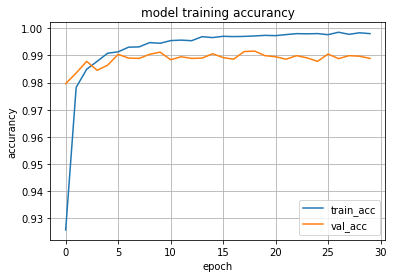

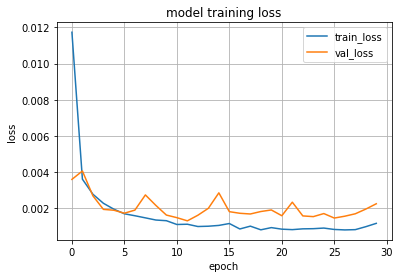

In [21]:
plt.plot(Model3.history['acc'])
plt.plot(Model3.history['val_acc'])
plt.title('model training accurancy')
plt.xlabel('epoch')
plt.ylabel('accurancy')
plt.legend(['train_acc','val_acc'],loc='best')
plt.grid()
plt.show()
plt.plot(Model2.history['loss'])
plt.plot(Model2.history['val_loss'])
plt.title('model training loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train_loss','val_loss'],loc='best')
plt.grid()
plt.show()

# 訓練結果

In [20]:
score = model1.evaluate(x_train1,y_train)
print(f'model1 train_loss:{score[0]}, train_accurancy:{score[1]}')
score = model2.evaluate(x_train1,y_train)
print(f'model2 train_loss:{score[0]}, train_accurancy:{score[1]}')
score = model3.evaluate(x_train1,y_train)
print(f'model3 train_loss:{score[0]}, train_accurancy:{score[1]}')

60000/60000 [==============================] - 3s 49us/step
model1 train_loss:0.0013685095731983045, train_accurancy:0.9917333333333334
60000/60000 [==============================] - 3s 54us/step
model2 train_loss:0.0011562244771960034, train_accurancy:0.9935666666666667
60000/60000 [==============================] - 3s 55us/step
model3 train_loss:0.007226891332302087, train_accurancy:0.9976


# 驗證節果

In [22]:
score = model1.evaluate(x_test1,y_test)
print(f'model valid_loss:{score[0]}, valid_accurancy:{score[1]}')
score = model2.evaluate(x_test1,y_test)
print(f'model valid_loss:{score[0]}, valid_accurancy:{score[1]}')
score = model3.evaluate(x_test1,y_test)
print(f'model valid_loss:{score[0]}, valid_accurancy:{score[1]}')

10000/10000 [==============================] - 1s 51us/step
model valid_loss:0.0025832554725616144, valid_accurancy:0.9834
10000/10000 [==============================] - 1s 54us/step
model valid_loss:0.0022575854118462666, valid_accurancy:0.9873
10000/10000 [==============================] - 1s 56us/step
model valid_loss:0.05094307429418577, valid_accurancy:0.9889


# MODEL1 混淆矩陣

In [23]:
y_predict = model1.predict(x_test1)
confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))

array([[ 978,    0,    0,    0,    0,    1,    0,    0,    1,    0],
       [   0, 1123,    2,    0,    1,    0,    3,    0,    6,    0],
       [   4,    0, 1019,    0,    2,    0,    0,    1,    6,    0],
       [   0,    0,    1, 1004,    0,    1,    0,    0,    3,    1],
       [   0,    0,    2,    0,  974,    0,    2,    0,    2,    2],
       [   2,    1,    0,    7,    1,  875,    2,    1,    2,    1],
       [   3,    3,    0,    0,    2,    3,  944,    0,    3,    0],
       [   0,    4,   19,    3,    0,    1,    0,  995,    2,    4],
       [   2,    0,    3,    3,    0,    2,    0,    1,  961,    2],
       [   3,    3,    2,    1,   12,    7,    1,    3,   16,  961]],
      dtype=int64)

# MODEL2 混淆矩陣

In [24]:
y_predict = model2.predict(x_test1)
confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))

array([[ 971,    0,    5,    1,    0,    0,    1,    1,    1,    0],
       [   0, 1127,    2,    0,    3,    1,    2,    0,    0,    0],
       [   0,    2, 1026,    1,    1,    0,    0,    2,    0,    0],
       [   0,    1,    0, 1006,    0,    0,    0,    2,    1,    0],
       [   0,    0,    1,    0,  977,    0,    0,    0,    0,    4],
       [   1,    0,    0,   13,    0,  876,    1,    0,    1,    0],
       [   5,    3,    1,    1,    3,    6,  937,    0,    2,    0],
       [   0,    4,    9,    1,    1,    2,    0, 1007,    2,    2],
       [   0,    0,    2,    2,    1,    1,    0,    0,  967,    1],
       [   0,    3,    1,    7,    6,    3,    0,    3,    7,  979]],
      dtype=int64)

# MODEL3 混淆矩陣

In [25]:
y_predict = model3.predict(x_test1)
confusion_matrix(y_test.argmax(axis=1),y_predict.argmax(axis=1))

array([[ 979,    0,    0,    0,    0,    0,    0,    0,    0,    1],
       [   1, 1134,    0,    0,    0,    0,    0,    0,    0,    0],
       [   2,    2, 1013,    6,    1,    0,    1,    2,    5,    0],
       [   0,    0,    1,  997,    0,    6,    0,    1,    4,    1],
       [   0,    0,    0,    0,  976,    0,    4,    0,    0,    2],
       [   1,    1,    0,    4,    0,  884,    1,    0,    1,    0],
       [   6,    3,    0,    0,    3,    5,  940,    0,    1,    0],
       [   0,    9,    3,    0,    4,    0,    0, 1008,    1,    3],
       [   2,    0,    0,    1,    0,    1,    0,    1,  969,    0],
       [   0,    2,    0,    1,   12,    1,    0,    1,    3,  989]],
      dtype=int64)

# 結論
增加filter數以及全連接層的神經元數只有讓正確率些微增加，若要讓訓練準確率到更接近應該還有一些參數可以試著調整